In [17]:
import sys, pandas as pd, numpy as np
sys.path.append('..')
from src.advanced_rag import AdvancedFinancialRAG
from src.evaluation import RAGEvaluator
from src.llm_generator import ComplaintGenerator
from src.evaluation_dashboard import create_evaluation_report


print("✅ RAG System Ready")

✅ RAG System Ready


In [18]:
# Cell 2: Initialize
rag = AdvancedFinancialRAG(verbose=True)
generator = ComplaintGenerator()  # This will load the LLM
stats = rag.get_dataset_statistics()
print(f"📊 Dataset: {stats['total_complaint_chunks']:,} chunks")

🚀 Initializing Advanced Financial RAG...


Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given


✅ System Ready: 10000 complaint chunks
🔄 Loading LLM model: gpt2...
✅ LLM Ready
📊 Dataset: 10,000 chunks


In [19]:
# Cell 3: Test with RAG + LLM
question = "What are customers saying about credit card fees?"
retrieved = rag.ask(question)

# Extract context from retrieved results
context_chunks = retrieved['business_insights']['key_findings']  # or use retrieved['sources']

answer = generator.generate_answer(question, context_chunks)
print(f"\n🤖 AI Answer: {answer}")


🤖 AI Answer: - We don't charge overdraft fees. Our rate is based on the amount of the overdraft. There are some overdraft fees that are not covered in our payment plans.


In [20]:
from src.advanced_rag import print_detailed_response  # Add this line

queries = [
    "What are the main complaints about credit cards?",
    "Why are customers unhappy with money transfers?",
    "Compare issues between personal loans and savings accounts"
]

for q in queries:
    print(f"\n{'='*80}")
    print(f"🔍 PROCESSING: {q}")
    response = rag.ask(q)
    print_detailed_response(response)


🔍 PROCESSING: What are the main complaints about credit cards?

📊 BUSINESS INTELLIGENCE REPORT

📝 QUESTION: What are the main complaints about credit cards?
🔍 DETECTED: Credit Card focus

💼 EXECUTIVE SUMMARY:
   Analysis of 5 complaints reveals Credit Card issues are most common, primarily related to Other features, terms, or problems.

🎯 KEY FINDINGS:
   • Top product: Credit Card
   • Most frequent issue: Other features, terms, or problems
   • Confidence level: MEDIUM

📈 CONFIDENCE ANALYSIS:
   Overall: MEDIUM (58.6/100)

📚 EVIDENCE SOURCES (5 complaints):
   [1] Credit Card - Other features, terms, or problems
      Similarity: 58.8%
   [2] Credit Card - Other features, terms, or problems
      Similarity: 58.8%
   [3] Credit Card - Other features, terms, or problems
      Similarity: 58.6%

🚀 RECOMMENDED ACTIONS:
   • Focus on Other features, terms, or problems resolution for Credit Card
   • Monitor emerging complaint patterns
   • Consider targeted customer outreach

📊 ANALYSIS

In [21]:
response = rag.ask("What are the most urgent issues?", product_filter="Mortgage")
print_detailed_response(response)


📊 BUSINESS INTELLIGENCE REPORT

📝 QUESTION: What are the most urgent issues?

💼 EXECUTIVE SUMMARY:
   Analysis of 5 complaints reveals Credit Card issues are most common, primarily related to Other features, terms, or problems.

🎯 KEY FINDINGS:
   • Top product: Credit Card
   • Most frequent issue: Other features, terms, or problems
   • Confidence level: MEDIUM

📈 CONFIDENCE ANALYSIS:
   Overall: MEDIUM (44.3/100)

📚 EVIDENCE SOURCES (5 complaints):
   [1] Credit Card - Other features, terms, or problems
      Similarity: 45.5%
   [2] Credit Card - Other features, terms, or problems
      Similarity: 44.5%
   [3] Credit Card - Other features, terms, or problems
      Similarity: 44.2%

🚀 RECOMMENDED ACTIONS:
   • Focus on Other features, terms, or problems resolution for Credit Card
   • Monitor emerging complaint patterns
   • Consider targeted customer outreach

📊 ANALYSIS METRICS:
   • Complaints analyzed: 5
   • Products covered: 1
   • Issues identified: 1



In [22]:
report = rag.get_performance_report()
print(f"\n📈 PERFORMANCE REPORT\n{'='*40}\nQueries: {report['summary']['total_queries_processed']}")
print(f"Success Rate: {report['summary']['success_rate']}")
for rec in report['recommendations']: print(f"• {rec}")


📈 PERFORMANCE REPORT
Queries: 5
Success Rate: 100.0%
• System performing optimally
• Ready for production deployment


In [23]:
evaluator = RAGEvaluator(rag)
results = evaluator.run_evaluation()
print(f"\n✅ Avg Confidence: {results['confidence'].mean():.1f}/100")
print(f"✅ Success Rate: {results['success'].mean()*100:.1f}%")

🧪 Running RAG Evaluation...

📝 Q1: What are the main complaints about credi...
   ✅ Retrieved: 5 complaints
   🎯 Confidence: 58.6/100
   📊 Keyword match: 1.7/5
   📈 Success: No

📝 Q2: Why are customers unhappy with money tra...
   ✅ Retrieved: 5 complaints
   🎯 Confidence: 50.5/100
   📊 Keyword match: 1.7/5
   📈 Success: No

📝 Q3: Compare issues between personal loans an...
   ✅ Retrieved: 5 complaints
   🎯 Confidence: 49.9/100
   📊 Keyword match: 1.7/5
   📈 Success: No

📝 Q4: How many complaints about mortgage proce...
   ✅ Retrieved: 5 complaints
   🎯 Confidence: 39.0/100
   📊 Keyword match: 1.2/5
   📈 Success: No

📈 EVALUATION SUMMARY
Average Confidence: 49.5/100
Average Retrieved: 5.0
Average Keyword Score: 1.6/5
Success Rate: 0.0%

✅ Avg Confidence: 49.5/100
✅ Success Rate: 0.0%


d:\10 acadamy\Intelligent Complaint Analysis for Financial Services\notebooks\..\src\evaluation_dashboard.py:100: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
d:\10 acadamy\Intelligent Complaint Analysis for Financial Services\notebooks\..\src\evaluation_dashboard.py:100: UserWarning: Glyph 128221 (\N{MEMO}) missing from current font.
  plt.tight_layout()
d:\10 acadamy\Intelligent Complaint Analysis for Financial Services\notebooks\..\src\evaluation_dashboard.py:100: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
d:\10 acadamy\Intelligent Complaint Analysis for Financial Services\notebooks\..\src\evaluation_dashboard.py:100: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
d:\10 acadamy\Intelligent Complaint Analysis for Financial Services\notebooks\..\src\evaluation_dashboard.py:100: UserWarning: Glyph 9989 (\N{WHITE HEAVY

✅ Dashboard saved to reports\evaluation_dashboard.png


d:\10 acadamy\Intelligent Complaint Analysis for Financial Services\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\10 acadamy\Intelligent Complaint Analysis for Financial Services\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128221 (\N{MEMO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\10 acadamy\Intelligent Complaint Analysis for Financial Services\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\10 acadamy\Intelligent Complaint Analysis for Financial Services\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\10 acadamy\Intelligent Complai

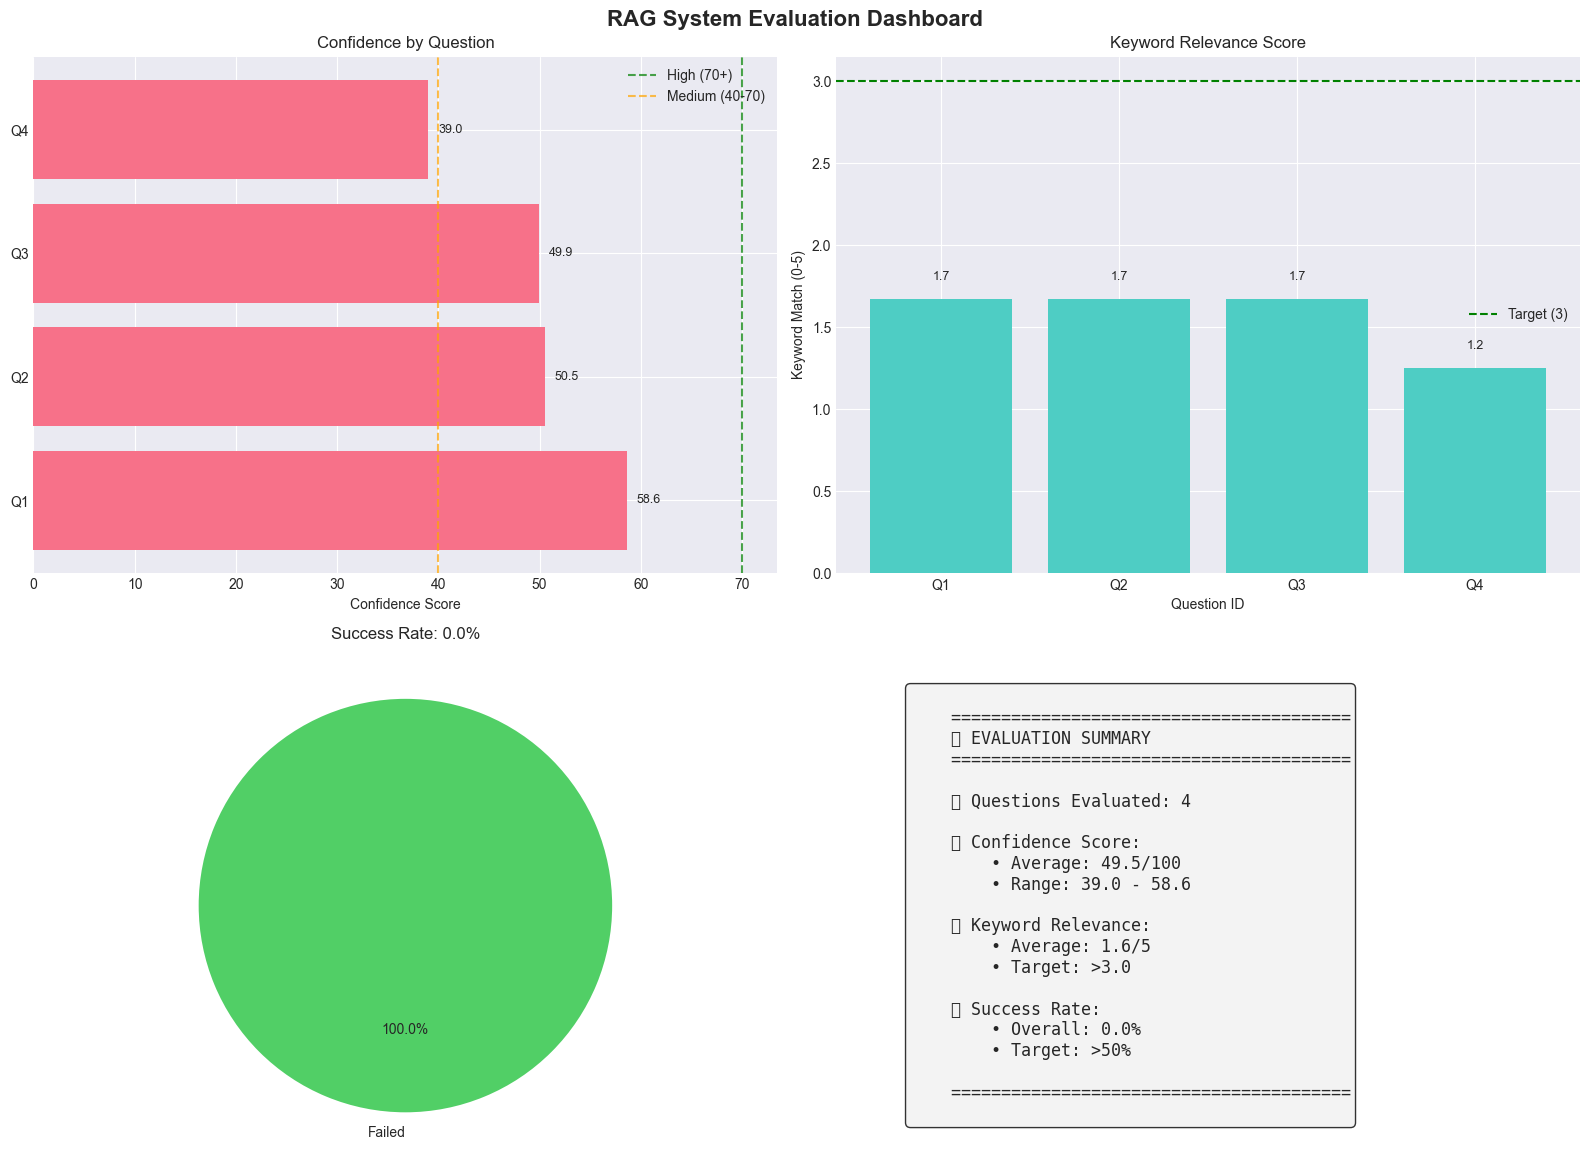


📋 RECOMMENDATIONS
🟡 MODERATE: Confidence scores need improvement
   • Fine-tune chunk size (currently 500)
   • Add hybrid search (semantic + keyword)
🔴 CRITICAL: Keyword relevance is low
   • Improve query understanding
   • Add query expansion
🔴 CRITICAL: Success rate is below target
   • Review failed queries
   • Improve retrieval accuracy


WindowsPath('reports/evaluation_dashboard.png')

In [24]:
# Cell 5: Generate Dashboard
create_evaluation_report(results)


In [25]:
# Cell 6: Print Recommendations
report = rag.get_performance_report()
print(f"\n📈 PERFORMANCE REPORT\n{report['summary']}")
for rec in report['recommendations']:
    print(f"  • {rec}")



📈 PERFORMANCE REPORT
{'total_queries_processed': 9, 'success_rate': '100.0%', 'avg_complaints_per_query': 5.0, 'system_uptime': 'Active'}
  • System performing optimally
  • Ready for production deployment


In [26]:
# Cell 7: Save Results
results.to_csv('reports/evaluation_results.csv', index=False)
print(f"✅ Results saved to reports/evaluation_results.csv")

✅ Results saved to reports/evaluation_results.csv
